In [16]:
# Requiered imports
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt

# 1. Dataset Description

The dataset amazon.csv from Kaggle (https://www.kaggle.com/datasets/mahmudulhaqueshawon/amazon-product-reviews) contains customer reviews from Amazon, along with a sentiment label for each review. It consists of approximately 20,000 entries, with two columns: Text (the review content) and label (the sentiment, where 1 typically represents positive and 0 represents negative).

In [6]:
# Load the dataset
df = pd.read_csv('../data/amazon.csv')

In [ ]:
df.info()

# 2. Text Pre-Processing

In [7]:
# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [8]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text) # Keep square brackets for now, will remove if needed later.
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(processed_tokens)

In [12]:
# Apply preprocessing
df['processed_text'] = df['Text'].apply(preprocess_text)

# 3. Data Exploration 

In [20]:
# Sentiment Distribution Analysis
sentiment_counts = df["label"].value_counts()

# Map numerical labels to sentiment names for better readability
sentiment_mapping = {1: "Positive", 0: "Negative"}
df["sentiment"] = df["label"].map(sentiment_mapping)
sentiment_counts_named = df["sentiment"].value_counts()
print(sentiment_counts_named)


sentiment
Positive    15230
Negative     4766
Name: count, dtype: int64


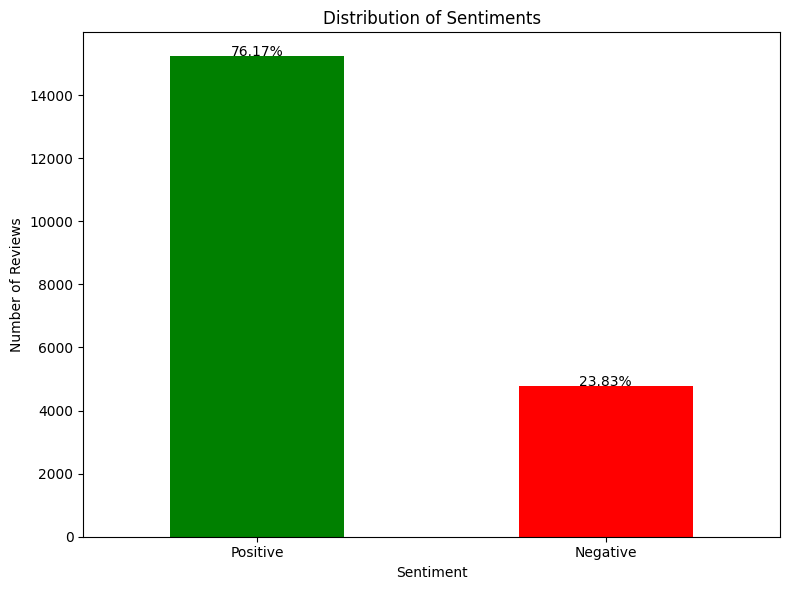

In [23]:
# Sentiment Distribution 
plt.figure(figsize=(8, 6))
sentiment_counts_named.plot(kind="bar", color=["green", "red"])
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.tight_layout()

# Sentiment Distribution Percentages

for i, count in enumerate(sentiment_counts_named):
    plt.text(i, count, f"{(count / len(df) * 100):.2f}%", ha='center')
